In [1]:
import pandas as pd
df_train =pd.read_csv("/content/Titanic_train.csv")
df_test = pd.read_csv("/content/Titanic_test.csv")



In [2]:
df_train.shape

(891, 12)

In [3]:
df_test.shape

(418, 11)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train["code"] = 1
df_test["code"] = 2


In [6]:
# merging the two data fils in one place
data = pd.concat([df_train,df_test])

In [7]:
data.shape

(1309, 13)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
# verifying the train samples as code 1 and code 2
data["code"].value_counts()

,count
code,
1,891
2,418


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,1.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [13]:
data['Age'].isna().sum()/len(data['Age'])*100

20.091673032849503

In [14]:
#Data cleaning

data['Age'].fillna(data['Age'].median(),inplace=True)

<ipython-input-14-778811c38ca8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [15]:
data['Fare'].fillna(data['Fare'].median(),inplace=True)


<ipython-input-15-ae37ac05ba0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data['Fare'].median(),inplace=True)


In [16]:
data['Cabin'].isna().sum()/len(data['Cabin'])*100


77.46371275783041

In [17]:
data.drop('Cabin',axis=1,inplace=True)


In [18]:
newdata = data[(data["Embarked"] == "S") | (data["Embarked"] == "C") | (data["Embarked"] == "Q")]
newdata.shape

(1307, 12)

In [19]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Embarked     1307 non-null   object 
 11  code         1307 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


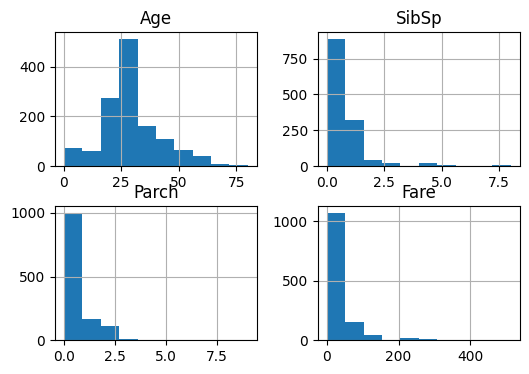

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#Histogram for all numerical variables
#numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_features = newdata[["Age","SibSp","Parch","Fare"]]
numerical_features.hist(figsize=(6, 4))
plt.show()

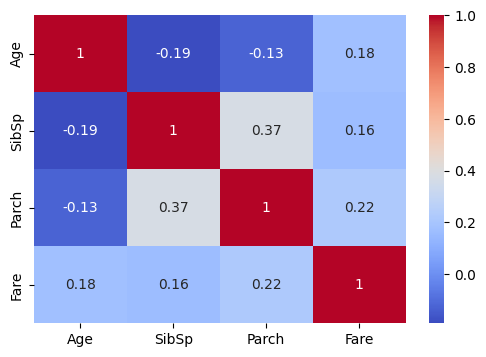

In [21]:
# Analyze correlation between features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

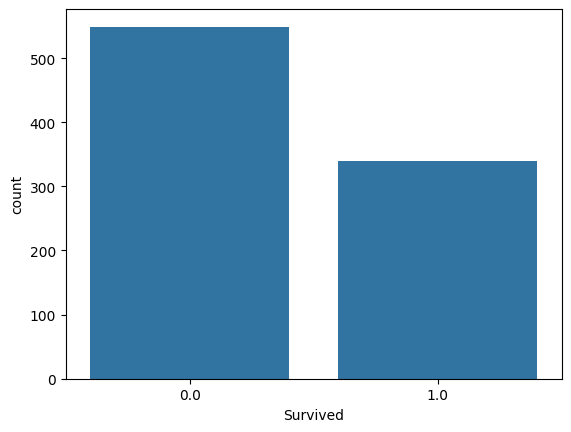

In [29]:
import seaborn as sns
# Reset the index of newdata
newdata = newdata.reset_index(drop=True)
# Now try to create the countplot
sns.countplot(x='Survived', data=newdata)

<Axes: xlabel='Survived', ylabel='count'>

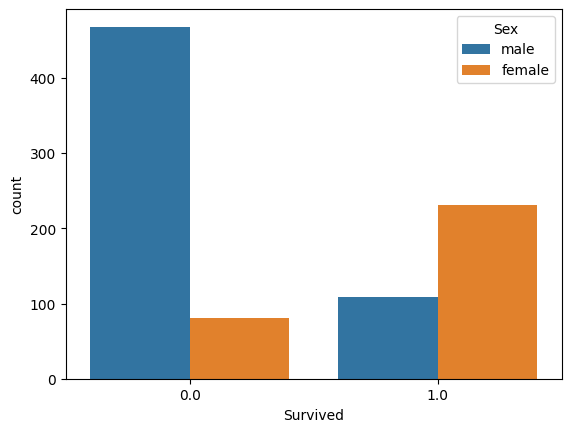

In [30]:
sns.countplot(x='Survived',data=newdata,hue='Sex')

In [31]:
newdata.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

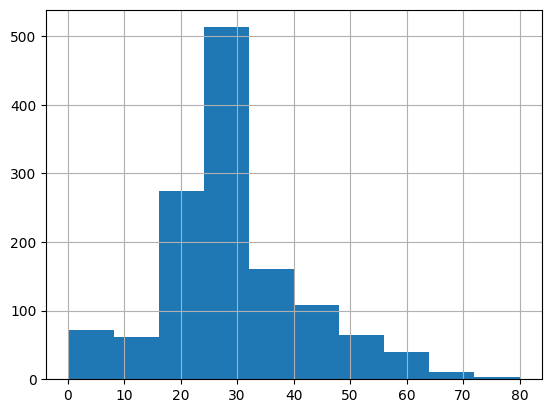

In [32]:
newdata["Age"].hist()

In [33]:
newdata["Embarked"].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [34]:
newdata["Age"].describe()

,Age
count,1307.000000
mean,29.471821
std,12.881592
min,0.170000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [35]:
newdata.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:
newdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [37]:
gender=pd.get_dummies(newdata['Sex'],drop_first=True)

In [38]:
newdata['Gender']=gender

In [39]:
newdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'code', 'Gender'],
      dtype='object')

In [40]:
newdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,True


In [41]:
newdata.drop(newdata.columns[[3,4,8,10]],axis=1,inplace=True)

In [42]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0.0,3,22.0,1,0,7.2500,1,True
1,2,1.0,1,38.0,1,0,71.2833,1,False
2,3,1.0,3,26.0,0,0,7.9250,1,False
3,4,1.0,1,35.0,1,0,53.1000,1,False
4,5,0.0,3,35.0,0,0,8.0500,1,True


In [43]:
newdata.ndim

2

In [44]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
newdata[["Age"]] = SS.fit_transform(newdata[["Age"]])
newdata[["SibSp"]] = SS.fit_transform(newdata[["SibSp"]])
newdata[["Parch"]] = SS.fit_transform(newdata[["Parch"]])
newdata[["Fare"]] = SS.fit_transform(newdata[["Fare"]])

In [45]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0.0,3,-0.580261,0.480272,-0.445407,-0.501839,1,True
1,2,1.0,1,0.662297,0.480272,-0.445407,0.736023,1,False
2,3,1.0,3,-0.269621,-0.479537,-0.445407,-0.488790,1,False
3,4,1.0,1,0.429318,0.480272,-0.445407,0.384512,1,False
4,5,0.0,3,0.429318,-0.479537,-0.445407,-0.486373,1,True


In [46]:
df_new_train = newdata[newdata['code'] == 1]
df_new_train.shape

(889, 9)

In [47]:
df_new_test = newdata[newdata['code'] == 2]
df_new_test.shape

(418, 9)

In [48]:
x_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_train = df_new_train["Survived"]

In [49]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_test = df_new_test["Survived"]

In [50]:
#IMPORTING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [51]:
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
lr.coef_

array([[-1.04829233, -0.49408201, -0.34839432, -0.08170794,  0.15236021,
        -2.64243059]])

In [53]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [54]:
y_pred_test = lr.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("Training accuracy:", round(ac1, 2)) # Use the round function instead of the round method

Training accuracy: 0.8


In [58]:
y_pred_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.795276,0.743827,0.708824,0.725904


In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [62]:
from sklearn.metrics import roc_curve,roc_auc_score
df_new_train["Y_proba"] = lr.predict_proba(x_train)[:,1]
df_new_train.head()

<ipython-input-62-5f7b67f5f85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train["Y_proba"] = lr.predict_proba(x_train)[:,1]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,Y_proba
0,1,0.0,3,-0.580261,0.480272,-0.445407,-0.501839,1,True,0.099002
1,2,1.0,1,0.662297,0.480272,-0.445407,0.736023,1,False,0.891419
2,3,1.0,3,-0.269621,-0.479537,-0.445407,-0.488790,1,False,0.649527
3,4,1.0,1,0.429318,0.480272,-0.445407,0.384512,1,False,0.897235
4,5,0.0,3,0.429318,-0.479537,-0.445407,-0.486373,1,True,0.085455


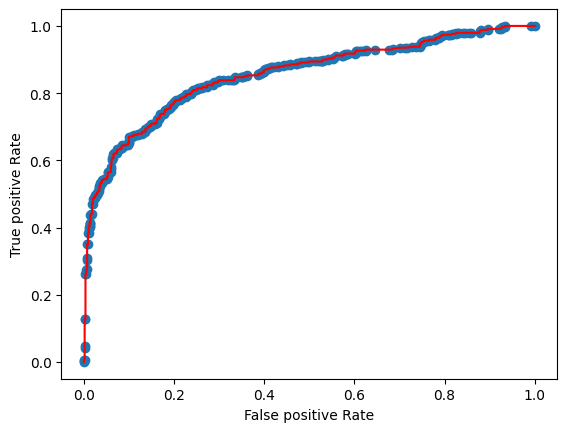

AUC score: 0.854


In [63]:
fpr,tpr,dummy = roc_curve(y_train,df_new_train["Y_proba"])
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

print("AUC score:", roc_auc_score(y_train,df_new_train["Y_proba"]).round(3))


In [64]:
#1. What is the difference between precision and recall?

#Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.

#Recall: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. It measures the model's ability to find all the relevant cases within the data. It is calculated as:


In [ ]:
#2. What is cross-validation, and why is it important in binary classification?


#Cross-validation is a technique used to assess the performance of machine learning models by splitting the dataset intomultiple subsets (folds) and training the model on different combinations of these subsets.

#cross-validation is an essential technique in binary classification for obtaining reliable performance estimates,reducing overfitting, and optimizing model hyperparameters.